# Exploratory Data Analysis (EDA) of AirBnB

[Kaggle Link](https://www.kaggle.com/airbnb/seattle)

In [47]:
# Data Representation
import numpy as np
import pandas as pd

# Statistical Packages
from distfit import distfit

# Visualization
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly
import plotly.express as px

# Magic Commands
%matplotlib inline

In [60]:
link = 'https://drive.google.com/file/d/1tT0lNiDHwGQPLa3N0zSdhZcJZaa5aqF3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]

In [61]:
listings_df = pd.read_csv(path)
listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [12]:
listings_df.shape

(3818, 92)

> The listings dataset contains 3,818 observations and 92 features

## Get to Know the Data with Exploratory Data Analysis

In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

> Find the what features contain empty values (i.e., have missing data)  

In [10]:
pd.set_option('display.max_rows', 100)
# % of NaN values
( 1 - listings_df.count() / len(listings_df) ) * 100

id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               4.635935
space                                14.903091
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                27.029859
notes                                42.063908
transit                              24.463070
thumbnail_url                         8.381351
medium_url                            8.381351
picture_url                           0.000000
xl_picture_url                        8.381351
host_id                               0.000000
host_url                              0.000000
host_name                             0.052383
host_since                            0.052383
host_location                         0.209534
host_about   

> Find what are the unique types of features in the dataset

In [24]:
listings_df.dtypes.unique() 

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

> This tells us that there are Integers, Objects (i.e., categoridcal variables), and Real-Value Float variables.  We can select each type of feature as follows... 

> Find what features are categorical (i.e., "object"s)

In [14]:
listings_df.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

> Find what features are integers or floats

In [27]:
listings_df.select_dtypes(include=['int', 'float']).columns 

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

> Find floats features

In [30]:
listings_df.select_dtypes(exclude=['object', 'int']).columns 

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [29]:
listings_df['bathrooms'].dtype

dtype('float64')

In [33]:
# find the distribution of bathrooms
listings_df['bathrooms'].value_counts().sort_index()

0.0       8
0.5      31
1.0    2882
1.5     248
2.0     373
2.5     124
3.0      64
3.5      57
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [35]:
px.histogram(listings_df, 
                x="bathrooms",
                title="Histogram of Bathrooms")

>> It does not seem to make sense that bathrooms is cast as a float object... intuition says that bathrooms should be a categorical variable

In [40]:
bathrooms_object = listings_df['bathrooms'].astype('object')
px.histogram(bathrooms_object, 
                title="Histogram of Bathrooms")

In [46]:
bathroom_indicators = pd.get_dummies(bathrooms_object)
bathroom_indicators

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,8.0
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,0,0,1,0,0,0,0,0,0,0
3814,0,0,1,0,0,0,0,0,0,0,0,0
3815,0,0,1,0,0,0,0,0,0,0,0,0
3816,0,0,1,0,0,0,0,0,0,0,0,0


In [62]:
test = listings_df.copy()

In [67]:
test['bathrooms'].shape

(3818,)

In [66]:
test['bathrooms'].dropna()

0       1.0
1       1.0
2       4.5
3       1.0
4       2.0
       ... 
3813    2.0
3814    1.0
3815    1.0
3816    1.0
3817    1.5
Name: bathrooms, Length: 3802, dtype: float64

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 19.1102550] [loc=1.259 scale=0.590]
[distfit] >[expon     ] [0.00 sec] [RSS: 21.6957933] [loc=0.000 scale=1.259]
[distfit] >[pareto    ] [0.07 sec] [RSS: 23.1118502] [loc=-1.391 scale=1.391]
[distfit] >[dweibull  ] [0.17 sec] [RSS: 14.3052298] [loc=1.000 scale=0.462]
[distfit] >[t         ] [0.10 sec] [RSS: 23.0517706] [loc=1.000 scale=0.000]
[distfit] >[genextreme] [0.09 sec] [RSS: 16.3900960] [loc=1.037 scale=0.325]
[distfit] >[gamma     ] [0.06 sec] [RSS: 17.8330770] [loc=-0.062 scale=0.178]
[distfit] >[lognorm   ] [0.07 sec] [RSS: 17.2652879] [loc=-0.156 scale=1.333]
[distfit] >[beta      ] [0.21 sec] [RSS: 17.8509092] [loc=-0.061 scale=14318786082.900]
[distfit] >[uniform   ] [0.00 sec] [RSS: 22.2705260] [loc=0.000 scale=8.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


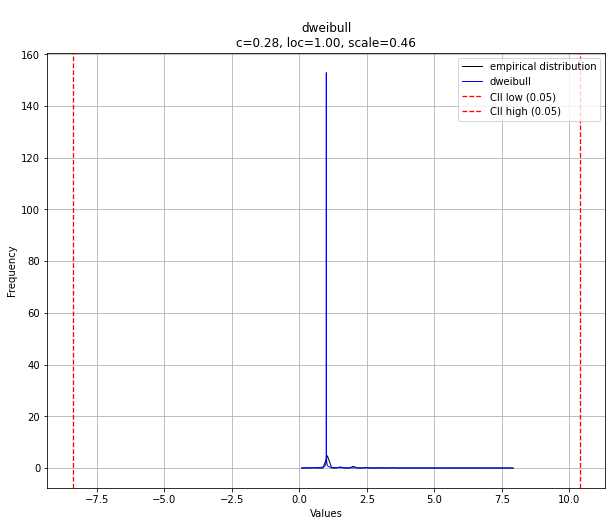

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ndweibull\nc=0.28, loc=1.00, scale=0.46'}, xlabel='Values', ylabel='Frequency'>)

In [68]:
dist = distfit(todf=True)
dist.fit_transform(test['bathrooms'].dropna())
dist.plot()

In [59]:
listings_df.dropna(subset=['bathrooms'])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [55]:
?dropna

Object `dropna` not found.
